## Tensorflow-model

In [36]:
# Import packages for tensorflow
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import metrics
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, LSTM
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [37]:
var_set = pd.read_csv('var_set.csv', parse_dates=[0],index_col=[0])

In [38]:
var_set['month'] = pd.DatetimeIndex(var_set.index).month

In [39]:
var_set

,SalmonPrice,CodPrice,HalibutPrice,CPI,TWI,month
2013-04-07,39.63,10.754267,47.577612,95.55,92.1500,4
2013-04-14,41.89,10.800751,47.924958,95.70,92.1920,4
2013-04-21,43.07,10.774089,47.092639,95.85,92.7980,4
2013-04-28,42.70,10.569605,47.193296,96.00,93.8080,4
2013-05-05,41.81,10.605343,48.987917,96.02,93.3125,5
...,...,...,...,...,...,...
2022-11-20,82.49,39.417280,76.897925,128.50,122.2180,11
2022-11-27,79.03,39.071706,73.642666,128.40,122.0320,11
2022-12-04,78.05,42.701713,73.193629,128.70,120.8780,12
2022-12-11,75.83,43.652968,74.156841,129.00,122.7060,12


In [40]:
X = var_set.drop(columns=["SalmonPrice"], axis = 1)
y = var_set["SalmonPrice"]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 50, shuffle=False)

In [42]:
x_uni = var_set["SalmonPrice"]

In [43]:
x_uni_train,y_uni_test = train_test_split(x_uni, test_size = 50, shuffle=False)

In [44]:
len(X_train)

457

In [45]:
# Scale x and y multivariate
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Scale y
scaler = MinMaxScaler()
y_train = scaler.fit_transform(y_train.values.reshape(-1,1))
y_test = scaler.transform(y_test.values.reshape(-1,1))

In [46]:
# Scale x and y multivariate
scaler = MinMaxScaler()
x_uni_train = scaler.fit_transform(x_uni_train.values.reshape(-1,1))
y_uni_test = scaler.transform(y_uni_test.values.reshape(-1,1))

In [47]:

scaler = MinMaxScaler()
x_minmax_train = scaler.fit_transform(x_uni_train)
y_minmax_test = scaler.transform(y_uni_test)

In [48]:
generated_batches = TimeseriesGenerator(x_minmax_train, x_minmax_train, length=52, batch_size=1)

In [49]:
len(generated_batches)

405

In [16]:
generated_batches

In [85]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape = (52, 1), return_sequences = True))
model.add(tf.keras.layers.LeakyReLU(alpha = 0.5))
model.add(tf.keras.layers.LSTM(128, return_sequences = True))
model.add(tf.keras.layers.LeakyReLU(alpha = 0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(64, return_sequences = False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))

In [87]:
model.compile(optimizer = 'adam', loss = 'mse')

In [88]:
# Fit the model
model.fit(generated_batches,epochs=20)

Epoch 1/20


2023-04-24 17:29:41.605918: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-24 17:29:41.989838: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-24 17:29:43.095498: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-24 17:29:43.525559: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-24 17:29:43.870991: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-24 17:29:44.618333: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-24 17:29:44.977465: I tensorflow/core/grappler/optimizers/cust

405/405 [==============================] - 26s 50ms/step - loss: 0.0314
Epoch 2/20
405/405 [==============================] - 21s 53ms/step - loss: 0.0145
Epoch 3/20
405/405 [==============================] - 20s 49ms/step - loss: 0.0109
Epoch 4/20
405/405 [==============================] - 20s 49ms/step - loss: 0.0093
Epoch 5/20
405/405 [==============================] - 20s 50ms/step - loss: 0.0072
Epoch 6/20
405/405 [==============================] - 20s 50ms/step - loss: 0.0067
Epoch 7/20
405/405 [==============================] - 20s 51ms/step - loss: 0.0069
Epoch 8/20
405/405 [==============================] - 21s 52ms/step - loss: 0.0065
Epoch 9/20
405/405 [==============================] - 21s 51ms/step - loss: 0.0064
Epoch 10/20
405/405 [==============================] - 21s 52ms/step - loss: 0.0057
Epoch 11/20
405/405 [==============================] - 21s 51ms/step - loss: 0.0058
Epoch 12/20
405/405 [==============================] - 20s 50ms/step - loss: 0.0058
Epoch 13/20


In [89]:
model.evaluate_generator(generated_batches, verbose = 0)

/var/folders/xy/_0zst1c12b9_m_438bw49zw40000gn/T/ipykernel_8697/3466006564.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(generated_batches, verbose = 0)
2023-04-24 17:37:53.187087: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-24 17:37:53.356156: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-24 17:37:53.519400: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-24 17:37:53.660167: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


0.05072352662682533

In [90]:
predictions = model.predict_generator(generated_batches)

/var/folders/xy/_0zst1c12b9_m_438bw49zw40000gn/T/ipykernel_8697/2349157815.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(generated_batches)
2023-04-24 17:38:40.396596: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-24 17:38:40.527278: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-24 17:38:40.663456: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-24 17:38:40.779258: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [ ]:
# Tensorflow model for-loop
batch_size = [1, 2, 4, 8, 16, 32, 64, 128]
epochs = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

for i in batch_size:
    for j in epochs:
        generated_batches = TimeseriesGenerator(x_minmax_train, x_minmax_train, length=52, batch_size=i)
        model.fit(generated_batches,epochs=j)
        

In [109]:
# Create the model
model = Sequential()
model.add(Flatten(input_shape=(52,1)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Fit the model
model.fit(generated_batches,epochs=50)

Epoch 1/50


2023-04-24 22:54:19.488206: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


405/405 [==============================] - 3s 7ms/step - loss: 0.0279
Epoch 2/50
405/405 [==============================] - 3s 7ms/step - loss: 0.0147
Epoch 3/50
405/405 [==============================] - 3s 7ms/step - loss: 0.0134
Epoch 4/50
405/405 [==============================] - 3s 7ms/step - loss: 0.0155
Epoch 5/50
405/405 [==============================] - 3s 7ms/step - loss: 0.0100
Epoch 6/50
405/405 [==============================] - 3s 7ms/step - loss: 0.0094
Epoch 7/50
405/405 [==============================] - 3s 7ms/step - loss: 0.0106
Epoch 8/50
405/405 [==============================] - 3s 7ms/step - loss: 0.0104
Epoch 9/50
405/405 [==============================] - 3s 7ms/step - loss: 0.0074
Epoch 10/50
405/405 [==============================] - 3s 7ms/step - loss: 0.0087
Epoch 11/50
405/405 [==============================] - 3s 7ms/step - loss: 0.0072
Epoch 12/50
405/405 [==============================] - 3s 7ms/step - loss: 0.0078
Epoch 13/50
405/405 [===============

1/1 [==============================] - 0s 13ms/step
Test RMSE: 0.414


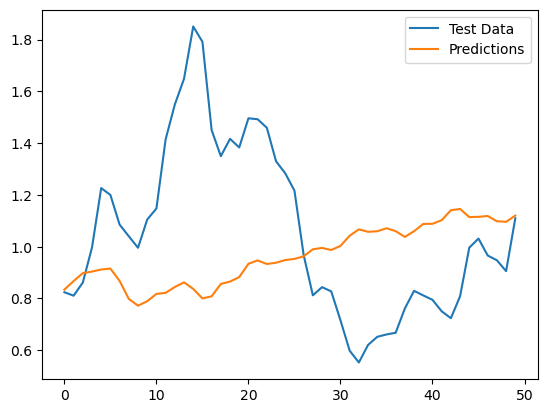

In [126]:
# Make predictions
test_predictions = []

first_eval_batch = x_minmax_train[-52:]
current_batch = first_eval_batch.reshape((1, 52, 1))

for i in range(len(y_minmax_test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

true_predictions = scaler.inverse_transform(test_predictions)

# Plot the predictions
test_predictions = pd.Series(true_predictions.reshape(50,))
y_uni_test = pd.Series(y_uni_test.reshape(50,))
plt.plot(y_uni_test, label='Test Data')
plt.plot(test_predictions, label='Predictions')
plt.legend()

# Evaluate the model
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_uni_test, test_predictions))
print('Test RMSE: %.3f' % rmse)

In [66]:
# Test different tensorflow models and outpit RMSE to a datafram
#batch_size = [1, 2, 4, 8, 16, 32, 64, 128]
batch_size = [1, 2]

#epochs = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
epochs = [1, 2, 3]

rmse_list = []

run = 0
b = 0
e = 0
rmse_df = pd.DataFrame(columns=['Run', 'Batch Size', 'Epochs', 'RMSE'])

for i in batch_size:
    b = b + 1
    for j in epochs:
        e = e + 1
        run = run + 1
        generated_batches = TimeseriesGenerator(x_minmax_train, x_minmax_train, length=52, batch_size=i)
        model_name = 'model_name' + str(run)
        print(model_name)
        model_name = Sequential()
        model_name.add(Flatten(input_shape=(52,1)))
        model_name.add(Dense(128, activation='relu'))
        model_name.add(Dropout(0.2))
        model_name.add(Dense(64, activation='relu'))
        model_name.add(Dropout(0.2))
        model_name.add(Dense(32, activation='relu'))
        model_name.add(Dense(1))
        model_name.compile(optimizer='adam', loss='mse')
        model_name.fit(generated_batches,epochs=j)
        print(model_name.summary())
        test_predictions = []
        first_eval_batch = x_minmax_train[-52:]
        current_batch = first_eval_batch.reshape((1, 52, 1))
        for k in range(len(y_minmax_test)):
            current_pred = model_name.predict(current_batch)[0]
            test_predictions.append(current_pred)
            current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
        true_predictions = scaler.inverse_transform(test_predictions)
        rmse = sqrt(mean_squared_error(y_uni_test, test_predictions))
        rmse_df = rmse_df.append({'Run': run, 'Batch Size': i, 'Epochs': j, 'RMSE': rmse}, ignore_index=True)
        rmse_list.append(rmse)
        print('Test RMSE: %.3f' % rmse)

model_name1
  1/405 [..............................] - ETA: 6:53 - loss: 0.0847

2023-04-24 23:47:26.306160: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


405/405 [==============================] - 4s 8ms/step - loss: 0.0262
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_19 (Flatten)        (None, 52)                0         
                                                                 
 dense_76 (Dense)            (None, 128)               6784      
                                                                 
 dropout_38 (Dropout)        (None, 128)               0         
                                                                 
 dense_77 (Dense)            (None, 64)                8256      
                                                                 
 dropout_39 (Dropout)        (None, 64)                0         
                                                                 
 dense_78 (Dense)            (None, 32)                2080      
                                                 

2023-04-24 23:47:29.764072: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 11ms/step
Test RMSE: 0.405
model_name2
Epoch 1/2


/var/folders/xy/_0zst1c12b9_m_438bw49zw40000gn/T/ipykernel_74781/31302593.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rmse_df = rmse_df.append({'Run': run, 'Batch Size': i, 'Epochs': j, 'RMSE': rmse}, ignore_index=True)
2023-04-24 23:47:31.475146: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


405/405 [==============================] - 4s 8ms/step - loss: 0.0286
Epoch 2/2
405/405 [==============================] - 3s 8ms/step - loss: 0.0159
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_20 (Flatten)        (None, 52)                0         
                                                                 
 dense_80 (Dense)            (None, 128)               6784      
                                                                 
 dropout_40 (Dropout)        (None, 128)               0         
                                                                 
 dense_81 (Dense)            (None, 64)                8256      
                                                                 
 dropout_41 (Dropout)        (None, 64)                0         
                                                                 
 dense_82 (Dense)            (None,

2023-04-24 23:47:37.930019: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 11ms/step
Test RMSE: 0.755
model_name3
Epoch 1/3


/var/folders/xy/_0zst1c12b9_m_438bw49zw40000gn/T/ipykernel_74781/31302593.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rmse_df = rmse_df.append({'Run': run, 'Batch Size': i, 'Epochs': j, 'RMSE': rmse}, ignore_index=True)
2023-04-24 23:47:39.634933: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


405/405 [==============================] - 3s 7ms/step - loss: 0.0271
Epoch 2/3
405/405 [==============================] - 3s 7ms/step - loss: 0.0139
Epoch 3/3
405/405 [==============================] - 3s 8ms/step - loss: 0.0123
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_21 (Flatten)        (None, 52)                0         
                                                                 
 dense_84 (Dense)            (None, 128)               6784      
                                                                 
 dropout_42 (Dropout)        (None, 128)               0         
                                                                 
 dense_85 (Dense)            (None, 64)                8256      
                                                                 
 dropout_43 (Dropout)        (None, 64)                0         
                     

2023-04-24 23:47:49.034947: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 13ms/step
Test RMSE: 0.530
model_name4


/var/folders/xy/_0zst1c12b9_m_438bw49zw40000gn/T/ipykernel_74781/31302593.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rmse_df = rmse_df.append({'Run': run, 'Batch Size': i, 'Epochs': j, 'RMSE': rmse}, ignore_index=True)
2023-04-24 23:47:50.892570: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


203/203 [==============================] - 2s 8ms/step - loss: 0.0348
Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_22 (Flatten)        (None, 52)                0         
                                                                 
 dense_88 (Dense)            (None, 128)               6784      
                                                                 
 dropout_44 (Dropout)        (None, 128)               0         
                                                                 
 dense_89 (Dense)            (None, 64)                8256      
                                                                 
 dropout_45 (Dropout)        (None, 64)                0         
                                                                 
 dense_90 (Dense)            (None, 32)                2080      
                                                 

2023-04-24 23:47:52.712851: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 14ms/step
Test RMSE: 0.397
model_name5
Epoch 1/2


/var/folders/xy/_0zst1c12b9_m_438bw49zw40000gn/T/ipykernel_74781/31302593.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rmse_df = rmse_df.append({'Run': run, 'Batch Size': i, 'Epochs': j, 'RMSE': rmse}, ignore_index=True)
2023-04-24 23:47:54.421805: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


203/203 [==============================] - 2s 8ms/step - loss: 0.0348
Epoch 2/2
203/203 [==============================] - 1s 7ms/step - loss: 0.0213
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_23 (Flatten)        (None, 52)                0         
                                                                 
 dense_92 (Dense)            (None, 128)               6784      
                                                                 
 dropout_46 (Dropout)        (None, 128)               0         
                                                                 
 dense_93 (Dense)            (None, 64)                8256      
                                                                 
 dropout_47 (Dropout)        (None, 64)                0         
                                                                 
 dense_94 (Dense)            (None,

2023-04-24 23:47:57.770559: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 11ms/step
Test RMSE: 0.626
model_name6
Epoch 1/3


/var/folders/xy/_0zst1c12b9_m_438bw49zw40000gn/T/ipykernel_74781/31302593.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rmse_df = rmse_df.append({'Run': run, 'Batch Size': i, 'Epochs': j, 'RMSE': rmse}, ignore_index=True)
2023-04-24 23:47:59.494153: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


203/203 [==============================] - 2s 8ms/step - loss: 0.0359
Epoch 2/3
203/203 [==============================] - 1s 7ms/step - loss: 0.0181
Epoch 3/3
203/203 [==============================] - 1s 7ms/step - loss: 0.0206
Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_24 (Flatten)        (None, 52)                0         
                                                                 
 dense_96 (Dense)            (None, 128)               6784      
                                                                 
 dropout_48 (Dropout)        (None, 128)               0         
                                                                 
 dense_97 (Dense)            (None, 64)                8256      
                                                                 
 dropout_49 (Dropout)        (None, 64)                0         
                     

2023-04-24 23:48:04.270679: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 11ms/step
Test RMSE: 0.686


/var/folders/xy/_0zst1c12b9_m_438bw49zw40000gn/T/ipykernel_74781/31302593.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rmse_df = rmse_df.append({'Run': run, 'Batch Size': i, 'Epochs': j, 'RMSE': rmse}, ignore_index=True)


In [67]:
rmse_list

[0.40461405935639605,
 0.754588383299769,
 0.5303972699430619,
 0.3974627369754104,
 0.62551200612084,
 0.6860805118645286]

In [73]:
rmse_df['Epochs'] = rmse_df['Epochs'].astype(int)
rmse_df['Batch Size'] = rmse_df['Batch Size'].astype(int)
rmse_df['Run'] = rmse_df['Run'].astype(int)

In [74]:
rmse_df

,Run,Batch Size,Epochs,RMSE
0,1,1,1,0.404614
1,2,1,2,0.754588
2,3,1,3,0.530397
3,4,2,1,0.397463
4,5,2,2,0.625512
5,6,2,3,0.686081


In [60]:
# Create dataframe with RMSE values when length of values does not match length of index
rmse_df = pd.DataFrame(rmse_list, columns = ['RMSE'])


In [61]:
rmse_df

,RMSE
0,0.865833
1,0.572840
2,0.668285
3,0.484725
4,0.803324
5,0.861428


In [56]:
# Create dataframe with RMSE values
rmse_df = pd.DataFrame(rmse_list, columns = ['RMSE'])
rmse_df['Batch Size'] = batch_size
rmse_df['Epochs'] = epochs

# Plot RMSE values
plt.plot(rmse_df['RMSE'], label='RMSE')
plt.legend()

# Find the best model_name
rmse_df[rmse_df['RMSE'] == rmse_df['RMSE'].min()]

ValueError: Length of values (2) does not match length of index (6)

In [54]:
rmse_df

,RMSE
0,0.865833
1,0.572840
2,0.668285
3,0.484725
4,0.803324
5,0.861428


1/1 [==============================] - 0s 11ms/step


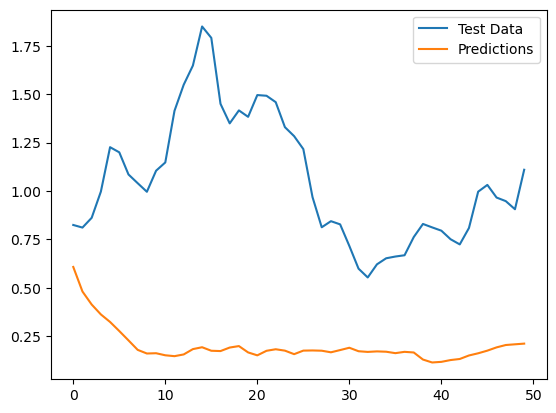

In [51]:
# Plot the best model_name
test_predictions = []
first_eval_batch = x_minmax_train[-52:]
current_batch = first_eval_batch.reshape((1, 52, 1))
for i in range(len(y_minmax_test)):
    current_pred = model_name.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
true_predictions = scaler.inverse_transform(test_predictions)
test_predictions = pd.Series(true_predictions.reshape(50,))
y_uni_test = pd.Series(y_uni_test.reshape(50,))
plt.plot(y_uni_test, label='Test Data')
plt.plot(test_predictions, label='Predictions')
plt.legend()
plt.show()